In [1]:
using Pkg, Plots
gr(fmt = :png)
pkg"activate ."
pkg"instantiate"
pkg"precompile"
using PerlaTonettiWaugh, DifferentialEquations

  Updating registry at `C:\Users\Arnav Sood\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


# Steady states

## Solving steady state solutions

Set up parameters and find the corresponding stationary solution:

In [2]:
# Define common objects. 
params = parameter_simple_stationary_defaults()
settings = settings_simple_defaults()

stationary_sol = stationary_numerical_simple(params, settings.z)

(g = 0.015026902905978254, v = [35.4795, 33.901, 32.5104, 31.2854, 30.2063, 29.2556, 28.4182, 27.6804, 27.0305, 26.458  …  21.2786, 21.0967, 20.8796, 20.6207, 20.3119, 19.9436, 19.5042, 18.9802, 18.3551, 17.6095])

# Transition dynamics

Setup for optimizer:

In [3]:
g_T = stationary_sol.g
params_transition = parameter_simple_transition_defaults()
settings = merge(settings, (g = t -> g_T, ))
ω = ω_weights(settings.z, params_transition.θ, params_transition.ξ);

## By solving the corresponding DAE

Find the corresponding solution:

In [4]:
daeprob = simpleDAE(params_transition, settings)
residuals, v_ts, g_ts = calculate_residuals(daeprob, params_transition.x, ω, IDA(), settings.t_grid);

### Plots

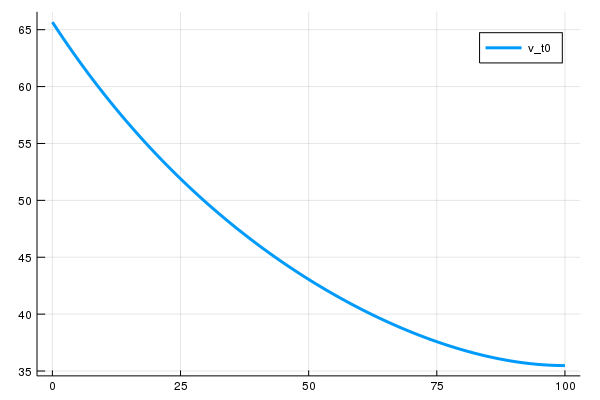

In [5]:
ts = plot(settings.t_grid, v_ts[1,:], label = "v_t0", lw = 3)

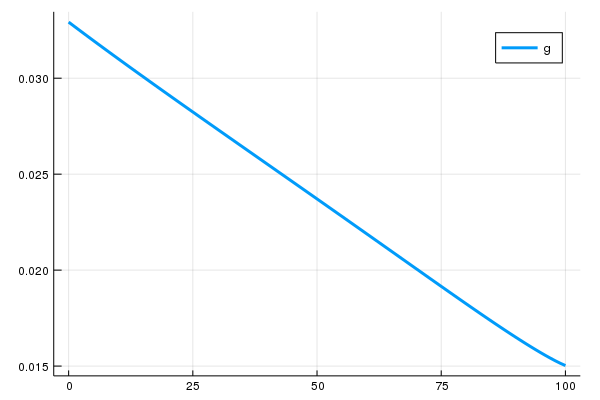

In [6]:
ts = plot(settings.t_grid, g_ts, label = "g", lw = 3)

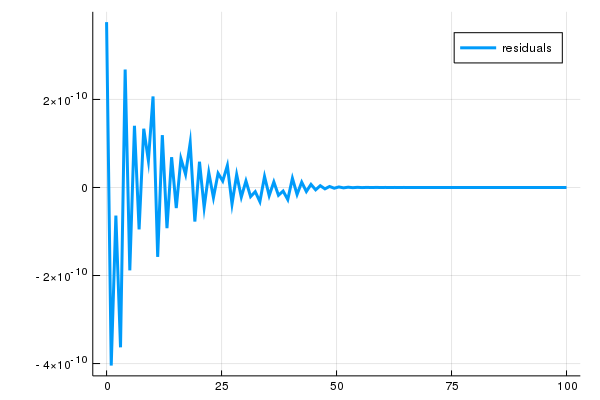

In [7]:
ts = plot(settings.t_grid, residuals, label = "residuals", lw = 3)

## By minimizing sum of squared residuals

In [8]:
residuals, v_ts, sol = minimize_residuals(params_transition, settings);

### Plots

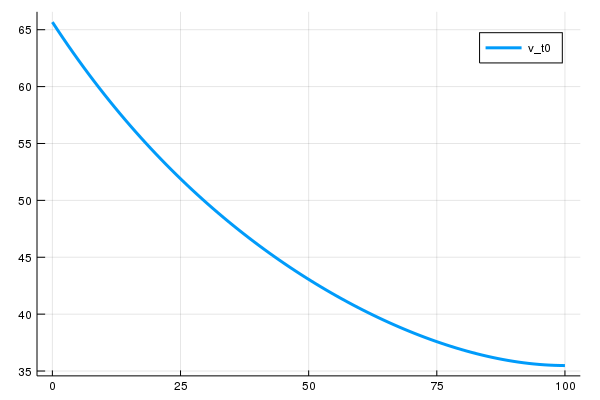

In [9]:
ts = plot(settings.t_grid, v_ts[1,:], label = "v_t0", lw = 3)

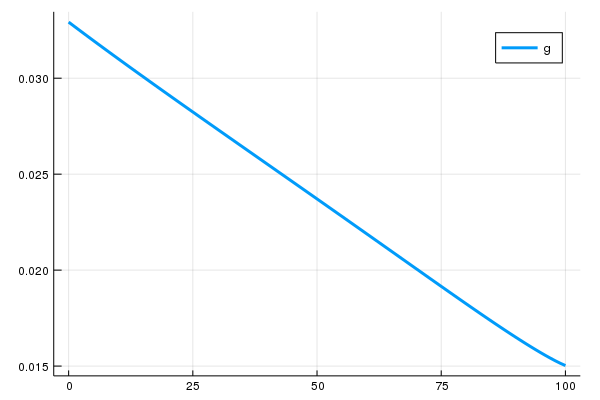

In [10]:
ts = plot(settings.t_grid, g_ts, label = "g", lw = 3)

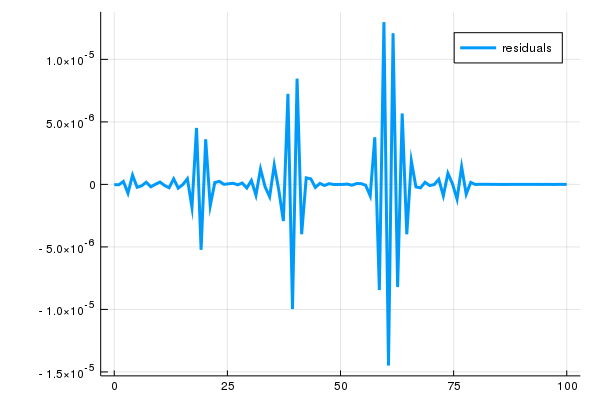

In [11]:
ts = plot(settings.t_grid, residuals, label = "residuals", lw = 3)